Download data from bull dozers competition from kaggle to proceed

In [29]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [30]:
from fastai.imports import *
from fastai.structured import *
import pandas as pd
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from IPython.display import display
from sklearn import metrics

In [31]:
PATH="./Data/Bulldozers"

In [32]:
df_raw = pd.read_csv('./Data/Bulldozers/Train.csv', 
                     low_memory=False,parse_dates=["saledate"])

In [33]:
def display_all(df):
   with pd.option_context("display.max_rows",1000,"display.max_columns",1000):
    display(df)

In [34]:
display_all(df_raw.head())

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [36]:
df_raw.SalePrice=np.log(df_raw.SalePrice)

In [37]:
#initial processing
#date addition of features
add_datepart(df_raw,'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [38]:
def convert_cat(df):
    for n,c in df.items():
        if is_string_dtype(c):
            df[n]=c.astype('category').cat.as_ordered()

In [39]:
#converting string as categories
convert_cat(df_raw)

In [40]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [41]:
df_raw.UsageBand.cat.set_categories(['High','Medium','Low'],ordered=True,inplace=True)

In [42]:
df_raw.UsageBand=df_raw.UsageBand.cat.codes

In [43]:
#perentage of missing values
display_all(df_raw.isna().sum().sort_values(ascending=False)/len(df_raw))

Pushblock                   0.937129
Blade_Extension             0.937129
Blade_Width                 0.937129
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Tip_Control                 0.937129
Scarifier                   0.937102
Grouser_Tracks              0.891899
Hydraulics_Flow             0.891899
Coupler_System              0.891660
fiModelSeries               0.858129
Steering_Controls           0.827064
Differential_Type           0.826959
fiModelDescriptor           0.820707
Backhoe_Mounting            0.803872
Turbocharged                0.802720
Stick                       0.802720
Pad_Type                    0.802720
Blade_Type                  0.800977
Travel_Controls             0.800975
Tire_Size                   0.763869
Grouser_Type                0.752813
Track_Type                  0.752813
Pattern_Changer             0.752651
Stick_Length                0.752651
Thumb                       0.752476
Undercarriage_Pad_Width     0.751020
R

In [44]:
os.makedirs('tmp',exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

In [45]:
#preprocessing
df_raw=pd.read_feather('tmp/bulldozers-raw')

/home/venkat/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [46]:
'''df_d=df.copy()
list=[]
for n,c in df_d.items():
    if is_numeric_dtype(df_d[n]):
        df_d[n+'_na'] = pd.isnull(col)
        df_d[n].fillna(df_d[n].median())
        #has_null.add()
        if df_d[n].isna().sum()!=0:
            list.append(n)
for n,c in df_d.items():
    if not is_numeric_dtype(df_d[n]):
        df_d[n]=df_d[n].cat.codes+1'''
df, y, nas = proc_df(df_raw, 'SalePrice')
#here all the numerical missing values are replaced with median
#and all the categorical values which were replaced with numbers like -1,0,1 are replaced with
#0(missing),1,2(categorical)
#and the target is seperated as y and dropped in original df

In [47]:
regressor=RandomForestRegressor(n_jobs=-1)
regressor.fit(df,y)
regressor.score(df,y)

0.9830336472779116

In [48]:
df_raw.shape,df.shape

((401125, 65), (401125, 66))

In [50]:
def split_vals(a,n):
    return a[:n].copy(),a[n:].copy()
n_valid=12000       #validation set size
n_train=len(df)-n_valid
raw_train,raw_test=split_vals(df_raw,n_train)
X_train,X_valid=split_vals(df,n_train)
y_train,y_valid=split_vals(y,n_train)
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((389125, 66), (389125,), (12000, 66), (12000,))

In [134]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())
def print_scores(m):
    print(rmse(m.predict(X_train),y_train))
    print(rmse(m.predict(X_valid),y_valid))
    print(m.score(X_train,y_train))
    print(m.score(X_valid,y_valid))
    if hasattr(m,'oob_score_'):print(m.oob_score_)

In [74]:
%time regressor.fit(X_train,y_train)
print_scores(regressor)             

CPU times: user 57.6 s, sys: 225 ms, total: 57.8 s
Wall time: 18.1 s
0.09050263102565134
0.24503335874803045
0.9828818339094728
0.8927744209747008


In [83]:
#speeding things up
df_trn,y_trn,nas=proc_df(df_raw,'SalePrice',subset=30000,na_dict=nas)
X_train,_=split_vals(df_trn,20000)
y_train,_=split_vals(y_trn,20000)

In [84]:
%time regressor.fit(X_train,y_train)
print_scores(regressor)

CPU times: user 2.07 s, sys: 4.18 ms, total: 2.07 s
Wall time: 690 ms
0.11458829125212341
0.36561604865283576
0.9717588726634132
0.7612746847576068


In [88]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_scores(m)

0.5237157810802371
0.5819571870237462
0.41008034833640206
0.39517456570310594


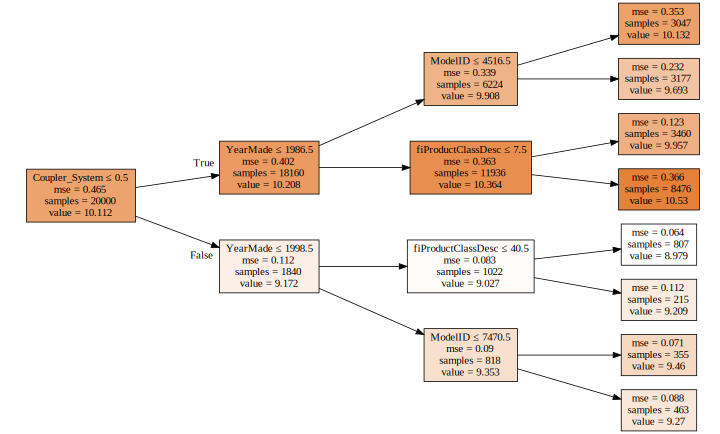

In [90]:
draw_tree(m.estimators_[0],df_trn,precision=3)

In [91]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_scores(m)

3.645271735473246e-06
0.4970805967045383
0.9999999999714201
0.5587328517706571


In [93]:
#bagging
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_scores(m)

0.115305182564957
0.36712765498615235
0.9714044010165528
0.7592966278942587


In [115]:
preds=np.stack([tree.predict(X_valid) for tree in m.estimators_])
preds[:,0],np.mean(preds[:,0]),y_valid[0]

(array([ 9.10498,  9.04782,  9.74097,  9.21034,  9.39266, 10.9682 ,  9.18502,  9.74097,  9.4727 ,  9.04782]),
 9.491148777806234,
 9.104979856318357)

In [116]:
X_valid.shape,preds.shape

((12000, 66), (10, 12000))

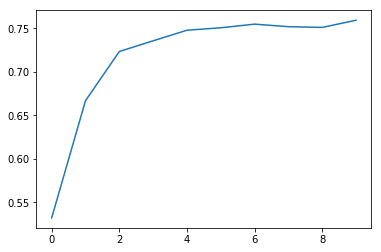

In [129]:
plt.plot([metrics.r2_score(y_valid,np.mean(preds[:i+1],axis=0)) for i in range(10)])

In [131]:
m=RandomForestRegressor(n_estimators=40,n_jobs=-1)
m.fit(X_train,y_train)
print_scores(m)

0.09853279511570452
0.351150151358005
0.9791184300177342
0.7797916950854931


In [132]:
m=RandomForestRegressor(n_estimators=80,n_jobs=-1)
m.fit(X_train,y_train)
print_scores(m)

0.09592970222404905
0.35180837061813913
0.980207177258861
0.7789653750933889


In [136]:
m=RandomForestRegressor(n_estimators=40,n_jobs=-1,oob_score=True)
m.fit(X_train,y_train)
print_scores(m)

0.0986439207253814
0.3487506247128684
0.979071302851323
0.7827909268424398
0.8501949273915913


In [138]:
##avoid overfitting: subsampling check fast ai code some things not clear
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_train)
y_train, y_valid = split_vals(y_trn, n_train)

In [147]:
m=RandomForestRegressor(n_jobs=-1,oob_score=True,bootstrap=True)
%time m.fit(X_train, y_train)
print_scores(m)

/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 59.6 s, sys: 583 ms, total: 1min
Wall time: 19.6 s
0.0904150146482842
0.25219759478435827
0.9829149623540944
0.8864126795026325
-1.3383249190985742


In [152]:
m=RandomForestRegressor(n_jobs=-1,oob_score=True,bootstrap=True,n_estimators=40)
%time m.fit(X_train, y_train)
print_scores(m)

CPU times: user 3min 57s, sys: 2.07 s, total: 3min 59s
Wall time: 1min 5s
0.07849877305050368
0.23793017427311314
0.987121639930309
0.898900962868541
0.9085344156616717


In [155]:
#min_sample_leaf
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_scores(m)

0.11494466314053263
0.2332323074988564
0.9723870726790946
0.9028538951210826
0.9086507199691144


In [156]:
#max_features
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3,max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_scores(m)

0.11927509950666713
0.2303927956534852
0.9702672964201334
0.905204927453035
0.911477167411403


In [ ]:
#thus we have a better model (improving accuracy) by introducing min_sample_leaf,sub_sample 
#and max_features used to reduce overfitting